<a href="https://colab.research.google.com/github/larguesa/FRL-CD-AM2/blob/main/FRL_CD_AM2_02_Aula_02_(Aprendizado_Supervisionado_Avan%C3%A7ado_e_Teoria_do_Erro)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Criando o Dataset
Vamos imaginar um cenário simples: classificar frutas como "maçãs" (0) ou laranjas" (1) com base em duas características: tamanho (em cm) e cor (um valor de 0 a 1, onde 0 é verde e 1 é laranja). O dataset terá 20 exemplos para ser básico, mas suficiente para ilustrar os conceitos.

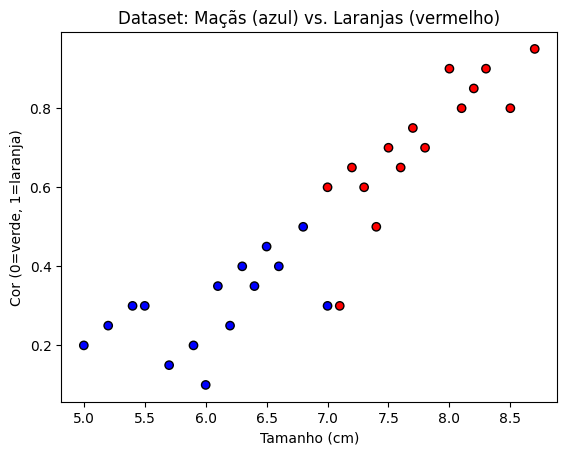

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Dataset
X = np.array([[5.0, 0.2], [5.2, 0.25], [5.5, 0.3], [5.7, 0.15], [6.0, 0.1],
              [6.1, 0.35], [6.3, 0.4], [6.5, 0.45], [7, 0.3], [6.8, 0.5],
              [5.9, 0.2], [6.2, 0.25], [5.4, 0.3], [6.4, 0.35], [6.6, 0.4],
              [7.0, 0.6], [7.2, 0.65], [7.5, 0.7], [7.7, 0.75], [8.0, 0.9],
              [8.2, 0.85], [8.5, 0.8], [8.7, 0.95], [7.1, 0.3], [7.3, 0.6],
              [7.4, 0.5], [7.6, 0.65], [7.8, 0.7], [8.1, 0.8], [8.3, 0.9]])
y = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
              1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

# Visualizar o dataset

#scatterplot é um gráfico que usa pontos mostrar a relação entre duas variáveis quantitativas num mapa bidimensional
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k')
plt.xlabel('Tamanho (cm)')
plt.ylabel('Cor (0=verde, 1=laranja)')
plt.title('Dataset: Maçãs (azul) vs. Laranjas (vermelho)')
plt.show()

Resultado: Um gráfico de dispersão mostrando maçãs (azul) e laranjas (vermelho). Note o ponto "confuso" (6.85, 0.5) perto da fronteira.

#Viés e Underfitting
Modelo Simples: Regressão Logística com uma linha reta.

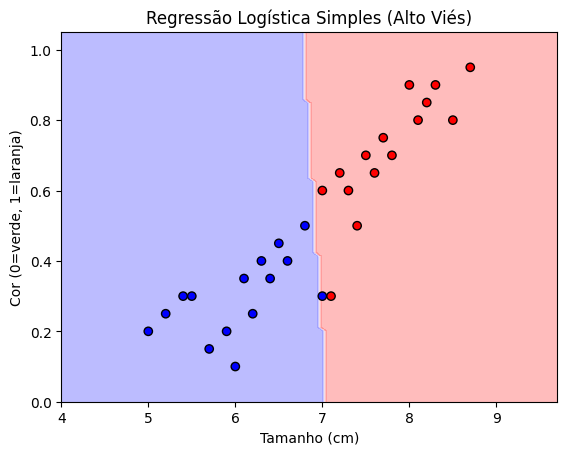

Acurácia no treino: 0.9666666666666667


In [ ]:
# Modelo simples (alto viés, underfitting)
model_simple = LogisticRegression()
#O que faz: Cria um objeto da classe LogisticRegression do scikit-learn, que é um modelo de regressão logística. Este modelo assume uma relação linear entre as variáveis de entrada (tamanho e cor) e a probabilidade de pertencer a uma classe (maçã ou laranja).
#Por que aqui: Usamos um modelo linear simples para demonstrar alto viés e underfitting, já que ele não consegue capturar relações mais complexas nos dados.
#Detalhe: Por padrão, LogisticRegression usa regularização L2 (parâmetro C=1.0), mas aqui o foco é na simplicidade, não ajustamos isso.
model_simple.fit(X, y)
#O que faz: Treina o modelo com os dados X (matriz 10x2 com tamanho e cor) e y (vetor com 10 classes: 0 para maçã, 1 para laranja). O método fit ajusta os pesos da regressão logística para minimizar o erro de classificação.
#Por que aqui: É o passo onde o modelo "aprende" a separar maçãs e laranjas com uma linha reta, o que será insuficiente para os dados, ilustrando underfitting.

# Plotar fronteira de decisão
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
#O que faz: Calcula os valores mínimo (x_min) e máximo (x_max) da primeira coluna de X (tamanho), subtraindo 1 do mínimo e adicionando 1 ao máximo para criar uma margem extra no gráfico.
#Por que aqui: Define os limites do eixo x (tamanho) para o gráfico, garantindo que a fronteira de decisão seja visível além dos pontos reais.
#Exemplo: Se o menor tamanho é 5.0 e o maior é 8.5, então x_min = 4.0 e x_max = 9.5.
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
#O que faz: Similar ao anterior, calcula os limites para a segunda coluna de X (cor), com uma margem menor (0.1) porque os valores de cor estão entre 0 e 1.
#Por que aqui: Define os limites do eixo y (cor) para o gráfico.
#Exemplo: Se a menor cor é 0.1 e a maior é 0.9, então y_min = 0.0 e y_max = 1.0.
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
#O que faz: Cria uma grade de 100x100 pontos cobrindo o espaço entre x_min/x_max (tamanho) e y_min/y_max (cor).
#np.linspace(x_min, x_max, 100) gera 100 valores igualmente espaçados entre x_min e x_max.
#np.meshgrid combina esses valores em duas matrizes: xx (coordenadas x) e yy (coordenadas y), representando todas as combinações possíveis de tamanho e cor no gráfico.
#Por que aqui: Prepara uma "malha" de pontos para prever a classe em toda a área do gráfico e desenhar a fronteira de decisão.
Z = model_simple.predict(np.c_[xx.ravel(), yy.ravel()])
#O que faz: Usa o modelo treinado para prever a classe (0 ou 1) de cada ponto na grade.
#xx.ravel() e yy.ravel() transformam as matrizes 100x100 em vetores de 10.000 elementos (achatam as dimensões).
#np.c_ combina esses vetores em uma matriz 10.000x2 (cada linha é um par [tamanho, cor]).
#predict retorna as previsões (0 ou 1) para cada ponto.
#Por que aqui: Gera as previsões que mostram onde o modelo "pensa" que estão maçãs e laranjas, para colorir o gráfico.
Z = Z.reshape(xx.shape)
#O que faz: Reformata o vetor de previsões Z (10.000 elementos) de volta para uma matriz 100x100, igual ao formato de xx e yy.
#Por que aqui: Prepara Z para ser usado no gráfico de contorno, alinhando as previsões com a grade de coordenadas.

plt.contourf(xx, yy, Z, alpha=0.3, cmap='bwr')
#O que faz: Desenha um gráfico de contorno preenchido (contourf) usando xx (eixo x), yy (eixo y) e Z (previsões).
#alpha=0.3 define transparência leve para o fundo.
#cmap='bwr' usa azul (0, maçãs) e vermelho (1, laranjas) para as regiões.
#Por que aqui: Mostra a fronteira de decisão (linha onde as cores mudam) e as áreas que o modelo classifica como maçãs ou laranjas.
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k')
#O que faz: Plota os 10 pontos reais do dataset como círculos.
#X[:, 0] é o tamanho (eixo x), X[:, 1] é a cor (eixo y).
#c=y colore os pontos conforme a classe real (0=azul, 1=vermelho).
#edgecolors='k' adiciona bordas pretas para destacar os pontos.
#Por que aqui: Sobrepoem os dados reais no gráfico para comparar com a fronteira prevista.
plt.xlabel('Tamanho (cm)')
plt.ylabel('Cor (0=verde, 1=laranja)')
plt.title('Regressão Logística Simples (Alto Viés)')
#O que faz: Adiciona rótulos aos eixos x (xlabel) e y (ylabel) e um título (title) ao gráfico.
#Por que aqui: Torna o gráfico legível, indicando que mostra um modelo simples com alto viés (underfitting).
plt.show()

# Acurácia no treino
print("Acurácia no treino:", model_simple.score(X, y))
#O que faz: Calcula e imprime a acurácia do modelo nos dados de treino.
#score(X, y) prevê as classes para X e compara com y, retornando a proporção de acertos (0 a 1).
#Por que aqui: Mostra quão bem o modelo se saiu no treino. Para um modelo com alto viés, a acurácia será baixa (ex.: 0.7 ou 70%), indicando underfitting.

Explicação: A linha reta não separa bem as classes (underfitting). O modelo é simples demais (alto viés), errando até no treino (acurácia baixa).

#Variância e Overfitting
Modelo Complexo: Regressão Logística com features polinomiais de grau 5.

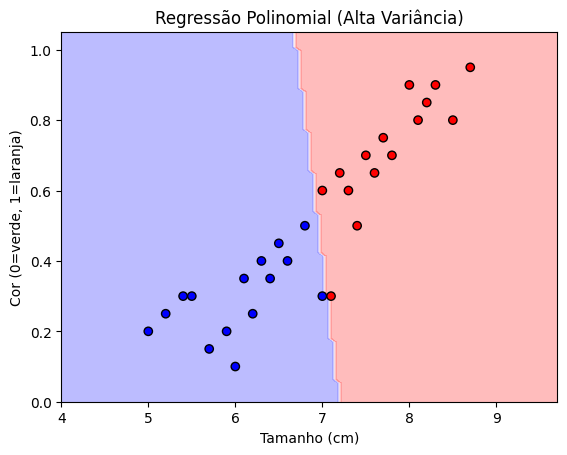

Acurácia no treino: 1.0


In [ ]:
# Modelo complexo (alta variância, overfitting)
model_complex = make_pipeline(PolynomialFeatures(degree=5), LogisticRegression())
#O que faz? Cria um modelo composto por duas etapas:
#PolynomialFeatures(degree=5): Transforma as duas características originais (tamanho e cor) em um conjunto maior de features polinomiais até o grau 5. Isso inclui termos como tamanho², cor², tamanho × cor, tamanho³, etc.
#LogisticRegression(): Usa regressão logística para classificar com base nessas novas features.
#Por quê? Um modelo polinomial de grau 5 é muito flexível, permitindo curvas complicadas. Isso aumenta a variância, pois ele pode se ajustar demais aos dados de treino, capturando até ruídos (overfitting).
#Detalhe: make_pipeline junta essas etapas em um único objeto, aplicando primeiro a transformação polinomial e depois a regressão.
model_complex.fit(X, y)
#O que faz? Treina o modelo usando os dados X (tamanho e cor) e os rótulos y (0 para maçã, 1 para laranja).
#Por quê? O treinamento ajusta os pesos da regressão logística para as features polinomiais, criando uma fronteira de decisão complexa. Como o grau é alto (5), o modelo tenta "memorizar" os dados, o que é típico de overfitting.
#Nota: X é um array 10x2 (10 frutas, 2 features), e y é um array de 10 rótulos.

# Plotar fronteira de decisão
Z = model_complex.predict(np.c_[xx.ravel(), yy.ravel()])
#O que faz? Faz previsões para uma grade de pontos no espaço 2D para desenhar a fronteira de decisão.
#xx e yy: São arrays 2D (100x100) criados anteriormente com np.meshgrid, cobrindo o espaço de tamanho (x) e cor (y).
#xx.ravel() e yy.ravel(): Transformam essas matrizes em vetores 1D com 10.000 pontos cada (100 × 100 = 10.000).
#np.c_[...]: Junta os vetores de tamanho e cor em um array 10.000x2, como se fossem novos dados de entrada.
#model_complex.predict(): Classifica cada ponto como 0 (maçã) ou 1 (laranja), gerando um vetor Z com 10.000 previsões.
#Por quê? Precisamos de previsões em muitos pontos para visualizar a fronteira de decisão, mostrando como o modelo separa as-classes. Um modelo complexo cria uma fronteira cheia de curvas, indicando alta variância.
Z = Z.reshape(xx.shape)
#O que faz? Transforma o vetor 1D Z (10.000 previsões) de volta em uma matriz 2D de 100x100, igual ao formato de xx e yy.
#Por quê? Para plotar a fronteira como uma área colorida no gráfico, precisamos que Z tenha o mesmo formato da grade (xx e yy). Isso permite que cada ponto da grade tenha uma previsão associada.

plt.contourf(xx, yy, Z, alpha=0.3, cmap='bwr')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k')
plt.xlabel('Tamanho (cm)')
plt.ylabel('Cor (0=verde, 1=laranja)')
plt.title('Regressão Polinomial (Alta Variância)')
plt.show()

# Acurácia no treino
print("Acurácia no treino:", model_complex.score(X, y))

Explicação: A fronteira é muito ajustada aos dados (overfitting), capturando até o ponto "confuso". Isso indica alta variância: o modelo "decora" o treino, mas pode falhar em novos dados. Repare que, identificadas claramente pela cor, uma maça muito grande ou uma laranja muito pequena seria confundida

#Validação Cruzada
Testando Generalização: Usar validação cruzada para comparar os modelos.

In [ ]:
# Validação cruzada (5-fold)
scores_simple = cross_val_score(model_simple, X, y, cv=10)
#O que faz? Executa validação cruzada k-fold com 5 divisões (folds) no modelo simples (model_simple), usando os dados de entrada X (tamanho e cor das frutas) e os rótulos y (0 para maçãs, 1 para laranjas). Retorna um array com 5 valores de acurácia, um para cada fold.
#Detalhamento:
#cross_val_score: Função do scikit-learn que realiza validação cruzada automaticamente. Ela divide os dados, treina o modelo em k-1 partes e testa na parte restante, repetindo k vezes.
#model_simple: O modelo que definimos antes (regressão logística linear). Aqui, ele será treinado e testado 5 vezes em diferentes combinações dos dados.
#X: Array com as características (tamanho e cor) das 10 frutas.
#y: Array com as classes (0 ou 1) das frutas.
#cv=5: Define k=5, ou seja, 5 folds. Com 10 exemplos, cada fold tem 2 exemplos para teste e 8 para treino por iteração.
#Por que é importante? Testa como o modelo simples generaliza. Se tiver alto viés (underfitting), a acurácia será baixa em todos os folds; se variar pouco, mostra consistência (mas talvez simplicidade excessiva).
scores_complex = cross_val_score(model_complex, X, y, cv=10)
#O que faz? Faz o mesmo que a linha anterior, mas agora para o modelo complexo (model_complex), que é uma regressão logística com features polinomiais de grau 5. Retorna um array com 5 acurácias, uma por fold.
#Detalhamento:
#model_complex: Modelo mais elaborado, criado com make_pipeline(PolynomialFeatures(degree=5), LogisticRegression()). Ele transforma os dados em polinômios (ex.: tamanho², tamanho*cor) antes de treinar.
#X, y, cv=5: Mesmos dados e parâmetros da linha anterior.
#Por que é importante? Avalia o modelo complexo. Se tiver alta variância (overfitting), as acurácias podem variar muito entre os folds, pois ele se ajusta demais a cada subconjunto de treino e falha nos testes.

print("Acurácia média (simples):", scores_simple.mean(), "±", scores_simple.std())
print("Acurácia média (complexo):", scores_complex.mean(), "±", scores_complex.std())

Acurácia média (simples): 0.9333333333333332 ± 0.19999999999999998
Acurácia média (complexo): 0.9 ± 0.1527525231651947


Explicação:
- Modelo Simples: Acurácia média baixa e desvio pequeno = alto viés, underfitting consistente.
- Modelo Complexo: Acurácia média talvez menor que no treino e desvio maior = alta variância, overfitting. (Nota: com poucos dados, os folds são pequenos, então os resultados podem variar; o padrão é o foco aqui.)

#Análise de Margens Amplas com SVM
Modelo SVM: Usar SVM com kernel linear para maximizar margens.

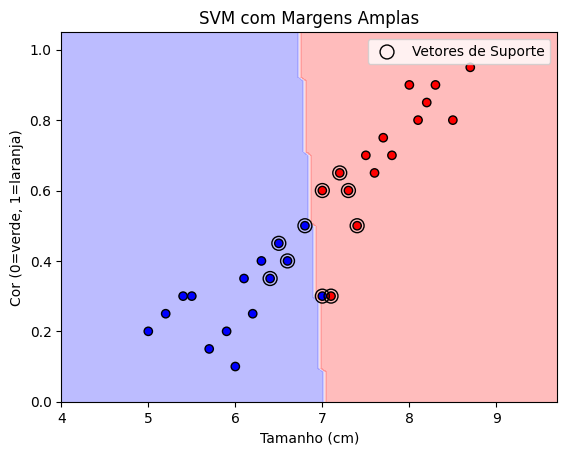

Acurácia no treino: 0.9666666666666667
Acurácia média (SVM): 0.9333333333333333 ± 0.08164965809277258


In [ ]:
# SVM com kernel linear
model_svm = SVC(kernel='linear', C=1.0)
#O que faz: Cria um modelo SVM para classificação usando a classe SVC (Support Vector Classifier) do scikit-learn.
#Detalhes:
#kernel='linear': Diz que o SVM vai usar uma linha reta (ou plano, em mais dimensões) para separar as classes. Aqui, é uma linha porque temos 2 características (tamanho e cor).
#C=1.0: Controla o equilíbrio entre margem ampla e erros de classificação. Um C grande prioriza acertar todos os pontos (pode reduzir a margem); um C pequeno prioriza margem ampla (permite alguns erros). 1.0 é um valor médio, bom para começar.
#Por quê? Queremos uma fronteira simples com margem ampla para ilustrar o conceito.
model_svm.fit(X, y)
#O que faz: Treina o modelo SVM com os dados X (tamanho e cor) e os rótulos y (0 para maçãs, 1 para laranjas).
#Detalhes: O SVM calcula a linha que separa as classes com a maior margem possível, identificando os "vetores de suporte" (pontos mais próximos da linha).
#Por quê? Após treinar, o modelo pode prever classes e nos dar informações como vetores de suporte.

# Plotar fronteira e margens
Z = model_svm.predict(np.c_[xx.ravel(), yy.ravel()])
#O que faz: Usa o modelo treinado para prever a classe de cada ponto em uma grade 2D (criada antes como xx e yy).
#Detalhes:
#xx e yy são uma malha de pontos cobrindo o espaço do gráfico (de tamanho mínimo a máximo e cor de 0 a 1), criada anteriormente com np.meshgrid.
#xx.ravel() e yy.ravel() transformam as matrizes em vetores únicos (achata os dados).
#np.c_[...] junta os vetores de tamanho e cor em pares (ex.: [5.0, 0.2], [5.0, 0.3], etc.).
#model_svm.predict() classifica cada par como 0 ou 1.
#Por quê? Precisamos dessas previsões para desenhar a fronteira de decisão no gráfico.
Z = Z.reshape(xx.shape)
#O que faz: Reformata o vetor de previsões (Z) para ter o mesmo formato da malha xx (ex.: 100x100 pontos).
#Detalhes: Isso permite usar Z como uma matriz para colorir o fundo do gráfico.
#Por quê? Para visualizar as regiões de maçãs (0) e laranjas (1) no plano.

plt.contourf(xx, yy, Z, alpha=0.3, cmap='bwr')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k')
plt.scatter(model_svm.support_vectors_[:, 0], model_svm.support_vectors_[:, 1],
            s=100, facecolors='none', edgecolors='k', label='Vetores de Suporte')
plt.xlabel('Tamanho (cm)')
plt.ylabel('Cor (0=verde, 1=laranja)')
plt.title('SVM com Margens Amplas')
plt.legend()
plt.show()

# Acurácia no treino
print("Acurácia no treino:", model_svm.score(X, y))

# Validação cruzada
scores_svm = cross_val_score(model_svm, X, y, cv=5)
print("Acurácia média (SVM):", scores_svm.mean(), "±", scores_svm.std())

Explicação: O SVM cria uma linha com margem ampla (mostrada pelos vetores de suporte). Isso reduz a variância (menos sensível ao ponto "confuso") e evita overfitting, equilibrando viés e variância.